In [57]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
df=pd.read_csv("data/istanbul-deniz-iskeleleri-yolcu-saylar.csv",encoding= 'unicode_escape')

In [5]:
df.head()

,yýl,ay,otorite_adý,istasyon_adý,yolcu_sayýsý
0,2021,12,ISTANBUL SEHIR HATLARI TUR. SAN. VE TIC. AS.,KADIKOY ESKI,106.0
1,2021,12,IDO-ISTANBUL DENIZ OTD. SAN. VE TIC. A.S.,SIRKECIHAREM,1373.0
2,2022,12,S.S. MAVI MARMARA DEN. YOL. TURZ. MOT. TASIY. ...,Burgazada,354.0
3,2021,12,IBB TOPLU ULASIM HIZMETLERI MUDURLUGU,KARAKOY,5416.0
4,2021,12,IBB TOPLU ULASIM HIZMETLERI MUDURLUGU,USKUDAR,13533.0


In [27]:
df.shape #veri setimizin satır ve sütun sayıları

(27464, 5)

In [28]:
df.columns

Index(['yýl', 'ay', 'otorite_adý', 'istasyon_adý', 'yolcu_sayýsý'], dtype='object')

In [61]:
df.columns=df.columns.str.replace("ý" ,"i") #harf düzeltmesi 

In [30]:
df.columns

Index(['yil', 'ay', 'otorite_adi', 'istasyon_adi', 'yolcu_sayisi'], dtype='object')

In [31]:
df.dtypes #veri türlerinde yanlışlık yok. Mesela yil değişkeni object olsaydi 

yil               int64
ay                int64
otorite_adi      object
istasyon_adi     object
yolcu_sayisi    float64
dtype: object

In [32]:
df.isnull().sum() #Eksik değerler kontrol edilir.

yil               0
ay                0
otorite_adi       0
istasyon_adi    602
yolcu_sayisi     10
dtype: int64

In [33]:
#Bu eksik değerleri doldurmak için o sütunun medyanı alınır ve eksik değerleri medyan yazılır.

In [34]:
yolcusayisi_median=df["yolcu_sayisi"].median()
yolcusayisi_median

1084.0

In [35]:
df["yolcu_sayisi"].fillna(yolcusayisi_median,inplace=True) #inplace true yaparak değşikliği kalıcı hale getiririz.

In [36]:
df.isnull().sum()

yil               0
ay                0
otorite_adi       0
istasyon_adi    602
yolcu_sayisi      0
dtype: int64

In [37]:
df['istasyon_adi']=df['istasyon_adi'].fillna('girilmemiş') #istasyon adı boş olan değerleri 'girilmemiş' olarak değiştiriyoruz.

In [62]:
df.isnull().sum()

yil               0
ay                0
otorite_adi       0
istasyon_adi    602
yolcu_sayisi     10
dtype: int64

In [ ]:
#Artık boş değer kalmadı.

In [63]:
df["yolcu_sayisi"].describe()

count     27454.000000
mean       4579.521964
std        8991.305493
min           1.000000
25%         325.250000
50%        1084.000000
75%        3974.750000
max      105260.000000
Name: yolcu_sayisi, dtype: float64

<AxesSubplot:>

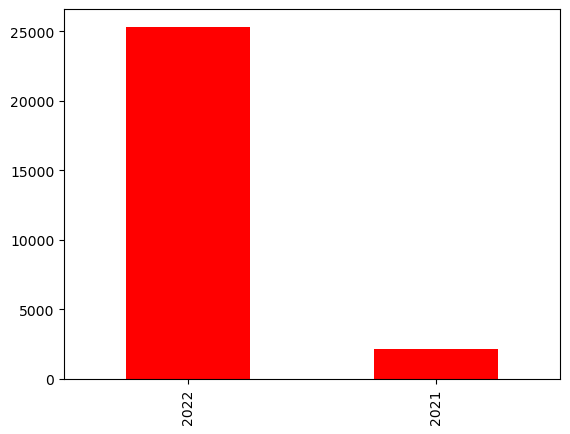

In [40]:
df["yil"].value_counts().plot(kind="bar",color="red") #yila göre yolcu sayılarının görselleştirilmiş hali

In [ ]:
#2022de yolcu sayısı daha fazla

Text(0.5, 1.0, 'istasyon kullanım grafiği')

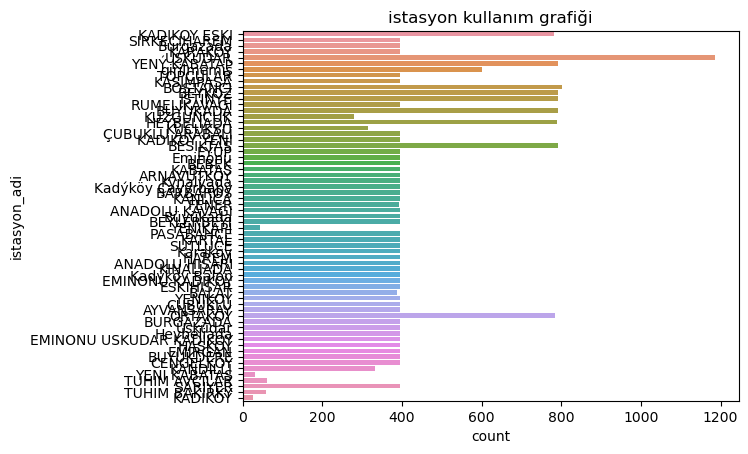

In [50]:
sns.countplot(y="istasyon_adi",data=df)
plt.title("istasyon kullanım grafiği") #grafiğe başlık verme

In [ ]:
#En çok Üsküdar istasyonu kullanılıyor.

Text(0.5, 1.0, 'Aylara Göre Yolcu Sayısı')

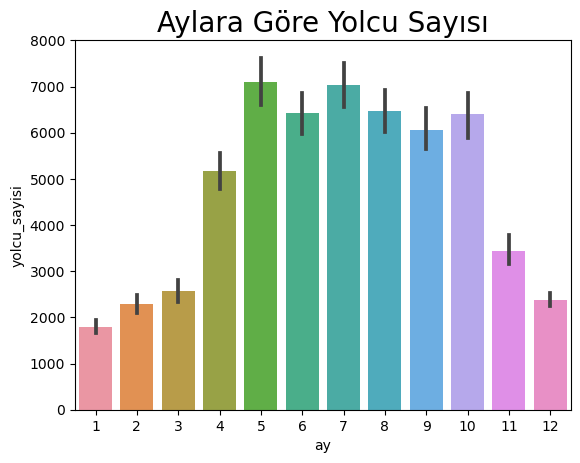

In [53]:
sns.barplot(x="ay",y="yolcu_sayisi",data=df)
plt.title("Aylara Göre Yolcu Sayısı" ,size=20)

<AxesSubplot:>

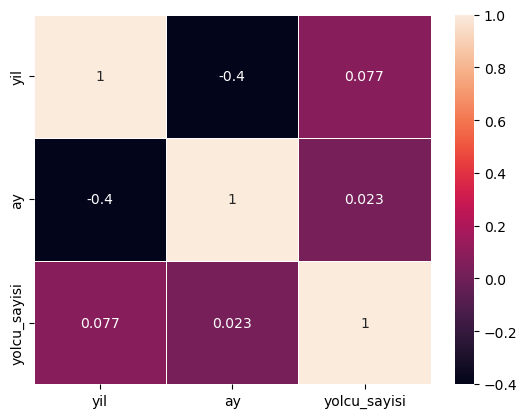

In [54]:
sns.heatmap(df.corr(), annot=True,linewidths=.5) #birbirleri arasındaki ilişkiyi gösteren ısı grafiği

<AxesSubplot:xlabel='yolcu_sayisi', ylabel='Count'>

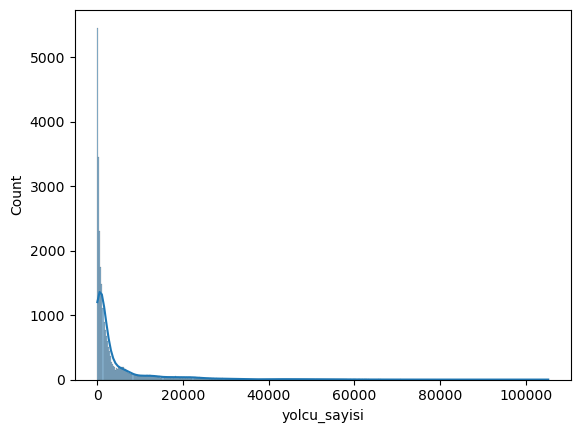

In [56]:
#yolcu dağılım grafiği
sns.histplot(df["yolcu_sayisi"],kde=True)